### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [119]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer, LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import variation



#### Load the flower_types dataset and print the first five observations

In [120]:
df1=pd.read_csv('flower_types.csv')
df1.head(15)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
pd.get_dummies(df1['class'],drop_first=True)

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,1
146,0,1
147,0,1
148,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
df1['sepal width'].isna().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
sepal_length_skewness=df1['sepal length'].skew()
print("Skewness of the sepal_length column:", sepal_length_skewness)
df1['sepal_length_log'] = np.log(df1['sepal length'])
sepal_length_log_skewness = df1['sepal_length_log'].skew()
print("Skewness of the transformed sepal_length column:", sepal_length_log_skewness)

Skewness of the sepal_length column: 0.3149109566369728
Skewness of the transformed sepal_length column: 0.043593975574027555


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# In the case of flower species in the flower_types dataset, frequency encoding may not be the best choice because the number of 
# unique categories is relatively small (three species: setosa, versicolor, and virginica) and each category is already well-
# defined and meaningful. Encoding each category with its frequency in the dataset may not provide much additional information 
# to the model.
# Instead,it may be more appropriate to use one-hot encoding or label encoding to represent the flower species in the flower_types 
# dataset. One-hot encoding creates a binary variable for each category, while label encoding assigns a unique integer to each 
# category. Both approaches can capture the categorical information in a more meaningful way and allow the model to differentiate 
# between different categories.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
print(df1['petal width'].max())
print(df1['petal width'].min())
MM = MinMaxScaler()
df1['petal_width_scaled'] = MM.fit_transform(df1[['petal width']])
print(df1['petal_width_scaled'].max())
print(df1['petal_width_scaled'].min())

2.5
0.1
1.0
0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
corr_matrix = df1.corr()
print(corr_matrix)

                    sepal length  sepal width  petal length  petal width  \
sepal length            1.000000    -0.109369      0.871754     0.817954   
sepal width            -0.109369     1.000000     -0.420516    -0.356544   
petal length            0.871754    -0.420516      1.000000     0.962757   
petal width             0.817954    -0.356544      0.962757     1.000000   
sepal_length_log        0.996880    -0.119396      0.878624     0.828210   
petal_width_scaled      0.817954    -0.356544      0.962757     1.000000   

                    sepal_length_log  petal_width_scaled  
sepal length                0.996880            0.817954  
sepal width                -0.119396           -0.356544  
petal length                0.878624            0.962757  
petal width                 0.828210            1.000000  
sepal_length_log            1.000000            0.828210  
petal_width_scaled          0.828210            1.000000  


In [63]:
bool_matrix = corr_matrix > 0.8
print(bool_matrix)

                    sepal length  sepal width  petal length  petal width  \
sepal length                True        False          True         True   
sepal width                False         True         False        False   
petal length                True        False          True         True   
petal width                 True        False          True         True   
sepal_length_log            True        False          True         True   
petal_width_scaled          True        False          True         True   

                    sepal_length_log  petal_width_scaled  
sepal length                    True                True  
sepal width                    False               False  
petal length                    True                True  
petal width                     True                True  
sepal_length_log                True                True  
petal_width_scaled              True                True  


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

sepal length  sepal width  petal length  petal width  class     
4.9           3.1          1.5           0.1          setosa        3
5.8           2.7          5.1           1.9          virginica     2
4.3           3.0          1.1           0.1          setosa        1
5.7           2.6          3.5           1.0          versicolor    1
5.6           3.0          4.5           1.5          versicolor    1
                                                                   ..
5.0           3.5          1.6           0.6          setosa        1
                           1.3           0.3          setosa        1
              3.4          1.6           0.4          setosa        1
                           1.5           0.2          setosa        1
6.0           3.4          4.5           1.6          versicolor    1
Length: 86, dtype: int64


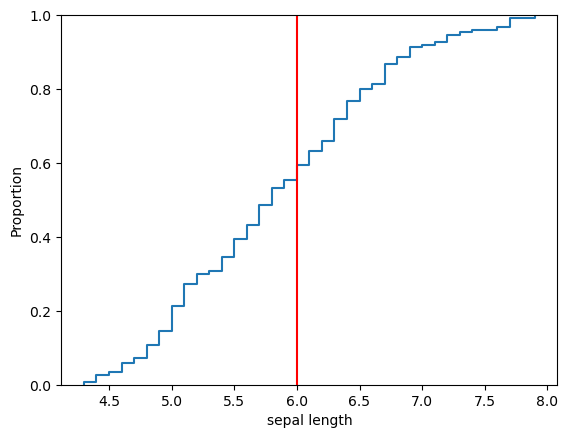

In [125]:
print(df1[df1['sepal length']<= 6].value_counts())

sns.ecdfplot(data=df1, x='sepal length')
plt.axvline(x=6, color='r')

In [112]:
species_counts = print(df1[df1['sepal length']<= 6].value_counts().reset_index(name='counts'))
species_counts
# plt.pie(species_counts['counts'], labels=species_counts['sepal length'], autopct='%1.1f%%')

    sepal length  sepal width  petal length  petal width       class  \
0            4.9          3.1           1.5          0.1      setosa   
1            5.8          2.7           5.1          1.9   virginica   
2            4.3          3.0           1.1          0.1      setosa   
3            5.7          2.6           3.5          1.0  versicolor   
4            5.6          3.0           4.5          1.5  versicolor   
..           ...          ...           ...          ...         ...   
81           5.0          3.5           1.6          0.6      setosa   
82           5.0          3.5           1.3          0.3      setosa   
83           5.0          3.4           1.6          0.4      setosa   
84           5.0          3.4           1.5          0.2      setosa   
85           6.0          3.4           4.5          1.6  versicolor   

    sepal_length_log  petal_width_scaled  counts  
0           1.589235            0.000000       3  
1           1.757858            0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [116]:
df1['class_map']=df1['class'].map({'setosa':0,'virginica':1,'versicolor':2})
df1['class_map'].unique()



array([0, 2, 1], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
df1.groupby('class')['petal length'].corr(df1['petal width'])

class
setosa        0.306308
versicolor    0.786668
virginica     0.322108
Name: petal length, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

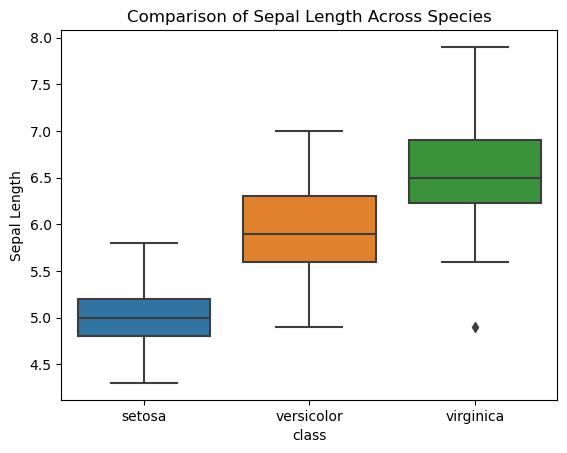

In [123]:
sns.boxplot(x='class', y='sepal length', data=df1)
plt.xlabel('class')
plt.ylabel('Sepal Length')
plt.title('Comparison of Sepal Length Across Species')
plt.show()